In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

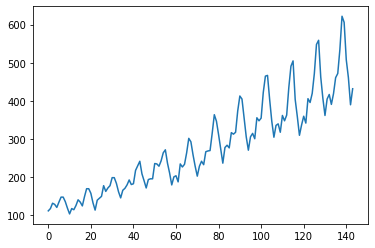

In [2]:
# 做時序圖觀察基本的趨勢和週期
data = pd.read_csv('AirPassengers.csv')
ts = data['#Passengers']
plt.plot(ts)

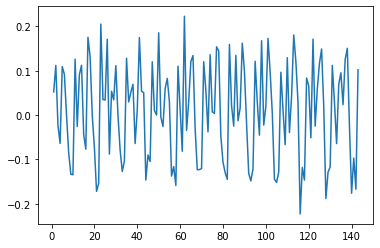

In [3]:
# 分析平穩性，正態性，週期性；並對數據進行轉換
ts_log = np.log(ts)
ts_diff = ts_log.diff(1) 
ts_diff = ts_diff.dropna() 
plt.plot(ts_diff)

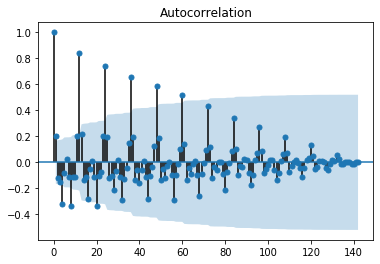

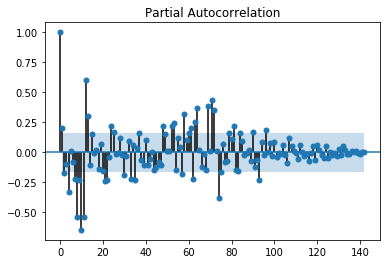

In [4]:
# 做自相關和偏自相關圖，確定模型階次
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

f = plot_acf(ts_diff)
f = plot_pacf(ts_diff, method='ols')

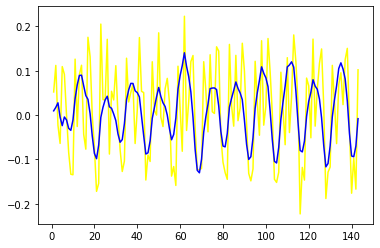

In [5]:
# 訓練模型
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_diff, color='#ffff00')
plt.plot(results_ARIMA.fittedvalues, color='#0000ff')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


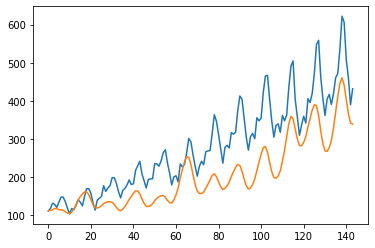

In [6]:
# 轉換回原始波形
pred_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
pred_diff_cumsum = pred_diff.cumsum()
pred_log = pd.Series(ts_log.ix[0], index=ts_log.index)
pred_log = pred_log.add(pred_diff_cumsum,fill_value=0)
pred = np.exp(pred_log)
plt.plot(ts)
plt.plot(pred)